<a href="https://colab.research.google.com/github/pedro1999-wolf/MVP-Sprint-2/blob/main/MVP_An%C3%A1lise_de_dados_e_boas_pr%C3%A1ticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Como se manter no topo do mercado: o investimento na qualidade de produções pode salvar a Netflix?**

A crise no mercado de streaming vem se agravando cada vez mais. Para além do alto índice de pirataria sobre produtos originais, a alta oferta de diferentes plataformas acirra o cenário competitivo pela parcela de consumidores efetivos. Portanto, os grandes streamings encontram-se em uma grande competição por espectadores fiéis a seus produtos, o que exige a elaboração de produtos audiovisuais de boa qualidade.

A Netflix, pioneira no mercado de streaming, já sofre os efeitos de um mercado altamente competitivo que levou a perda de assinantes e de investimento. Seus representantes já informaram que a empresa vai passar a priorizar subir os lucros fazendo dinheiro com os atuais consumidores. As medidas tomadas para aumentar a receita envolvem cobrar por número de telas simultâneas, inserir propagandas em opções de assinaturas mais baratas, e investir em produção de conteúdo original.

Atualmente, a netflix segue em primeiro lugar no ranking de assinantes. Porém, a plataforma não está invicta desde seu nascimento, pois em 2021 e 2022 a Disney + conquistou o topo do pódio temporariamente. Agora, mais do que nunca, as empresas devem investir em produções audiovisuais de qualidade que atraiam novos assinantes e mantenham seus consumidores fiéis. Entretanto, essa não tem sido a realidade, pois a netflix costuma tomar decisões controversas em seus investimentos. A exemplo, o filme "Army of the dead" produzido pelo diretor Zack Snyder, cuja avaliação foi razoavelmente boa (75% no rotten tomatoes), teve sua continuação cancelada, enquanto que o fiasco da duologia "Rebel moon" do mesmo diretor foi um ótimo exemplo de dinheiro jogado no lixo.

Este trabalho, portanto, consiste numa avaliação dos melhores investimentos audiovisuais que a netflix pode fazer nos EUA daqui para frente, baseado no rating do público sobre conteúdo audiovisual. Considerando, como já exemplificado, que a Netflix nem sempre toma as melhores decisões na produção de filmes e séries, a minha hipótese é: Manter consumidores fiéis nos Estados Unidos consiste em investir em produções audiovisuais que reflitam a avaliação do público sobre o conteúdo existente. A hipótese, portanto, só poderia ser testada após a Netflix tomar essas diretrizes e termos a resposta de mercado. Trata-se, portanto, de um problema de aprendizado supervisionado  no futuro, que avaliará a relação das medidas tomadas com os resultados de avaliação do público e número de assinantes (novos e mantidos).

**Meu método consistiu em:**

**1-** Importar os pacostes necessários.

**2-** Importar um banco de dados sobre filmes e séries da Netflix dos
Estados Unidos. O banco de dados conta com os seguintes atributos:
 - **show_id** = um identificador do filme - String
 - **type** = se é filme ou série - String
 - **title** = título do filme - String
 - **director** = nome do diretor - String
 - **country** = país onde o filme foi produzido - String
 - **date_added** = data em que foi adicionado na netflix - String
 - **realese_year** = data em que o filme estreiou - String
 - **rating** = nota dada pelo público - Float
 - **duration** = Duração da série em temporadas ou do filme em minutos - String
 - **listed_in** = Gêneros do filme/série - String

**3-** Enriquecer o banco de dados de filmes e séries da Netflix com o valor de 'rating' (avaliação) de outros bancos de dados, utilizando 4 fontes distintas para maximizar o número de filmes e séries que eu conseguiria as notas do público

**4-** Realizar análises exploratórias (estatísticas descritivas e vizualizações) dos dados em conjunto com o pré-processamento continuamente com as análises, indicando todo o processo com auxílio de comentários.

**5-** Realizar o processamento dos dados para a aplicação em modelos de machine-learning.


**Restrições aplicadas:**

- Não foram permitidas instâncias vazias








## **1. Importação de pacotes**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as splot
from pandas.api.types import CategoricalDtype
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

## **2. Importação dos dados**

In [3]:
# Dataset principal
url = "https://raw.githubusercontent.com/pedro1999-wolf/MVP-Sprint-2/main/netflix1.csv"

# Importação do dataset principal
netflix = pd.read_csv(url, delimiter=',')

# Datasets que serão usados para alimentar o principal (fonte)
url1 = "https://raw.githubusercontent.com/pedro1999-wolf/MVP-Sprint-2/main/fonte1.csv"
url2 = "https://raw.githubusercontent.com/pedro1999-wolf/MVP-Sprint-2/main/fonte2.csv"
url3 = "https://raw.githubusercontent.com/pedro1999-wolf/MVP-Sprint-2/main/fonte3.csv"
url4 = "https://raw.githubusercontent.com/pedro1999-wolf/MVP-Sprint-2/main/fonte4.csv"

#Importação de Datasets fonte
fonte1 = pd.read_csv(url1, delimiter=',')
fonte2 = pd.read_csv(url2, delimiter=',')
fonte3 = pd.read_csv(url3, delimiter=',')
fonte4 = pd.read_csv(url4, delimiter=',')

## **3. Enriquecimento dos dados**

In [4]:
# Padronizando as colunas 'title' e 'rating' em todas os datasets, para que a função que agrega "rating" das fontes identifique adequadamente o nome do filme.
fonte3.rename(columns={'MOVIES': 'title'}, inplace=True)
fonte4.rename(columns={'Name': 'title'}, inplace=True) # Agora todos os datasets fonte tem 'title' para nome do filme
fonte1.rename(columns={'vote_average': 'rating'}, inplace=True)
fonte2.rename(columns={'imdb_score': 'rating'}, inplace=True)
fonte3.rename(columns={'RATING': 'rating'}, inplace=True)
fonte4.rename(columns={'Rating': 'rating'}, inplace=True) # Agora todos os datasets fonte possuem 'rating' padronizado

# Enriquecimento dos dados
lista_tabelas = [fonte1,fonte2,fonte3,fonte4] # Guardando todas as fontes de "rating" em um objeto

def get_rating(title):
    for tabela in lista_tabelas:
        if title in tabela["title"].values:
            return tabela.loc[tabela["title"] == title, "rating"].iloc[0]
    return None # Função que retorna o valor "rating" das tabelas fontes para o título do filme

netflix['rating'] = netflix['title'].apply(get_rating) # Aplica a função get_rating para criar a nova coluna 'rating' no DataFrame 'netflix'

## **4. Análises e tratamentos dos dados**

### **a. Estatísticas descritivas**

In [5]:
# Checando número de atributos e instâncias
print(netflix.shape)

(8790, 10)


In [6]:
# Checando a equidade de instâncias por atributo
print(netflix.count()) # rating está com instâncias faltantes

show_id         8790
type            8790
title           8790
director        8790
country         8790
date_added      8790
release_year    8790
rating          5385
duration        8790
listed_in       8790
dtype: int64


In [7]:
# Checando as primeiras linhas do Dataset
netflix.head() # o atributo 'duration' difere entre filmes e séries

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,7.4,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,7.0,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,7.7,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,5.2,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,7.0,125 min,"Dramas, Independent Movies, International Movies"


In [8]:
# Checando se as instâncias faltantes
print(netflix.isnull().sum()) # Hé 3405 filmes/séries sem nota

# Eliminando as instâncias sem nota para filmes/séries
netflix = netflix.dropna(how='any')

show_id            0
type               0
title              0
director           0
country            0
date_added         0
release_year       0
rating          3405
duration           0
listed_in          0
dtype: int64


In [9]:
# Checando os tipos de dados dos atributos
netflix.dtypes # Identificadas as transformações necessárias

,0
show_id,object
type,object
title,object
director,object
country,object
date_added,object
release_year,int64
rating,float64
duration,object
listed_in,object


In [10]:
# Transformações nos atributos do dataset geral
netflix['listed_in'] = netflix['listed_in'].str.split(',')# Converter o atributo 'listed_in'(string) em lista, visto que o atributo contem mais de um gênero para um filme/série

netflix['release_year'] = netflix['release_year'].astype(str)# Converter o atributo 'release_year' em categórico

netflix['duration'] = netflix['duration'].str.extract('(\d+)').astype(int)# Converter o atributo 'duration' em intenger, eliminando sua parte textual

# Separar o dataset em 2: um para filmes e outro para séries. Isso é necessário pois a duração das séries está em temporadas (categórico), e dos filmes em minutos (numérico).
netflix_tvshows = netflix[netflix['type'] == 'TV Show']
netflix_movies = netflix[netflix['type'] == 'Movie']

<ipython-input-10-b69d1bf9eb80>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix['listed_in'] = netflix['listed_in'].str.split(',')# Converter o atributo 'listed_in'(string) em lista, visto que o atributo contem mais de um gênero para um filme/série
<ipython-input-10-b69d1bf9eb80>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix['release_year'] = netflix['release_year'].astype(str)# Converter o atributo 'release_year' em categórico
<ipython-input-10-b69d1bf9eb80>:6: SettingWithCopyWarning: 


In [11]:
netflix_movies.dtypes

,0
show_id,object
type,object
title,object
director,object
country,object
date_added,object
release_year,object
rating,float64
duration,int64
listed_in,object


In [12]:
netflix_tvshows.dtypes

,0
show_id,object
type,object
title,object
director,object
country,object
date_added,object
release_year,object
rating,float64
duration,int64
listed_in,object


In [13]:
# Estatísticas descritivas

# Min, max, média e desvio padrão
print(netflix.describe())
print(netflix_tvshows.describe())
print(netflix_movies.describe())

# Medianas
mediana = netflix['rating'].median()
print(f"Mediana geral de rating: {mediana}")
mediana2 = netflix_movies['rating'].median()
print(f"Mediana de rating em filmes: {mediana2}")
mediana3 = netflix_movies['duration'].median()
print(f"Mediana de duration em filmes: {mediana3}")
mediana4 = netflix_tvshows['rating'].median()
print(f"Mediana de rating em séries: {mediana4}")

# Modas
moda = netflix['rating'].mode()[0]
print(f"Moda geral de rating: {moda}")
moda2 = netflix_movies['rating'].mode()[0]
print(f"Moda de rating em filmes: {moda2}")
moda3 = netflix_movies['duration'].mode()[0]
print(f"Moda de duration em filmes: {moda3}")

            rating     duration
count  5385.000000  5385.000000
mean      6.585460    69.419313
std       1.099469    51.893449
min       1.500000     1.000000
25%       5.900000     2.000000
50%       6.700000    90.000000
75%       7.400000   107.000000
max       9.600000   312.000000
            rating     duration
count  1763.000000  1763.000000
mean      7.046625     1.903006
std       1.069027     1.675830
min       1.800000     1.000000
25%       6.500000     1.000000
50%       7.200000     1.000000
75%       7.800000     2.000000
max       9.600000    17.000000
            rating     duration
count  3622.000000  3622.000000
mean      6.360988   102.282717
std       1.042756    26.513634
min       1.500000     3.000000
25%       5.800000    89.000000
50%       6.500000   101.000000
75%       7.100000   116.000000
max       9.100000   312.000000
Mediana geral de rating: 6.7
Mediana de rating em filmes: 6.5
Mediana de duration em filmes: 101.0
Mediana de rating em séries: 7.2
Moda

### **b. Vizualizações dos dados**

### **Há outliers em 'rating' e 'duration'?**

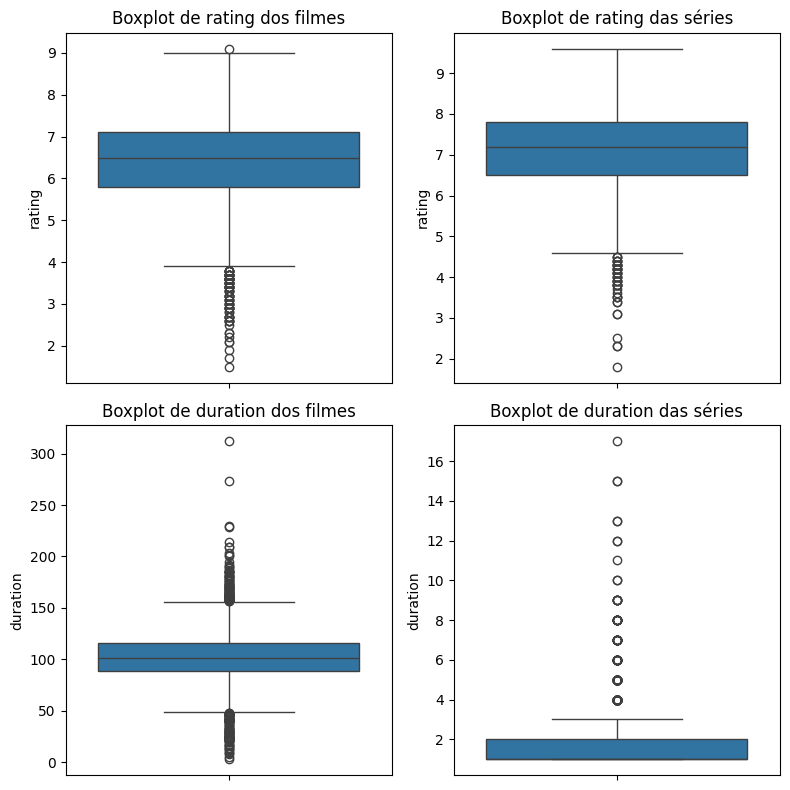

In [14]:
# Boxplot das variáveis numéricas

fig, ax = plt.subplots(2,2, figsize=(8,8))

splot.boxplot(netflix_movies['rating'], ax=ax[0,0])
ax[0,0].set_title('Boxplot de rating dos filmes')

splot.boxplot(netflix_tvshows['rating'], ax=ax[0,1])
ax[0,1].set_title('Boxplot de rating das séries')

splot.boxplot(netflix_movies['duration'], ax=ax[1,0])
ax[1,0].set_title('Boxplot de duration dos filmes')

splot.boxplot(netflix_tvshows['duration'], ax=ax[1,1])
ax[1,1].set_title('Boxplot de duration das séries')

plt.tight_layout()

plt.show()

**Podemos identificar que todas as variáveis numéricas possuem um grande número de outliers. Esses outliers serão removidos na etapa de processamento para o modelo de machine-learning.**

### **Quais as distribuições dos dados 'rating' e 'duration'?**







<ipython-input-15-f9b0b427ad0e>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  splot.kdeplot(netflix_movies['rating'], shade=True, ax=ax[0,0])
<ipython-input-15-f9b0b427ad0e>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  splot.kdeplot(netflix_tvshows['rating'],shade=True, ax=ax[0,1])
<ipython-input-15-f9b0b427ad0e>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  splot.kdeplot(netflix_movies['duration'], shade=True, ax=ax[1,0])
<ipython-input-15-f9b0b427ad0e>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  splot.kdeplot(netflix_tvshows['du

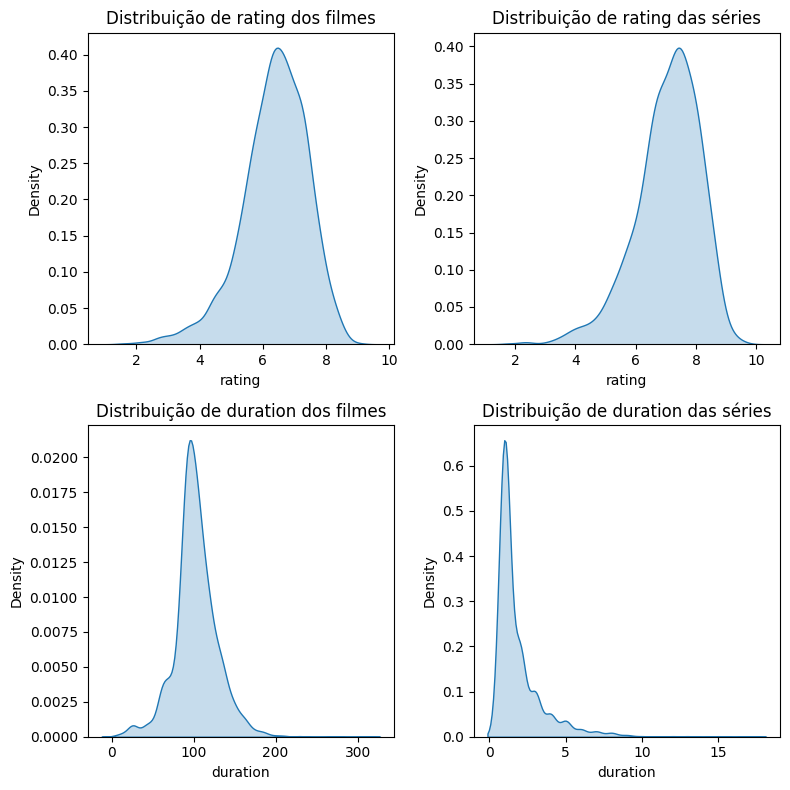

In [15]:
# Gráficos de densidade

fig, ax = plt.subplots(2,2, figsize=(8,8))

splot.kdeplot(netflix_movies['rating'], shade=True, ax=ax[0,0])
ax[0,0].set_title('Distribuição de rating dos filmes')

splot.kdeplot(netflix_tvshows['rating'],shade=True, ax=ax[0,1])
ax[0,1].set_title('Distribuição de rating das séries')

splot.kdeplot(netflix_movies['duration'], shade=True, ax=ax[1,0])
ax[1,0].set_title('Distribuição de duration dos filmes')

splot.kdeplot(netflix_tvshows['duration'], shade=True, ax=ax[1,1])
ax[1,1].set_title('Distribuição de duration das séries')

plt.tight_layout()

plt.show()

**Acima podemos observar os gráficos de densidade das 2 variáveis númericas de cada subconjunto dos dados (filmes ou séries). Nenhuma das variáveis possuí uma distribuição gaussiana, apesar 'rating' em filmes e séries e 'duration' dos filmes estarem próximos de uma, e 'duration' em séries está com uma distribuição gamma.**

### **Qual a relação entre as variáveis 'duration' e 'rating' para filmes e séries?**

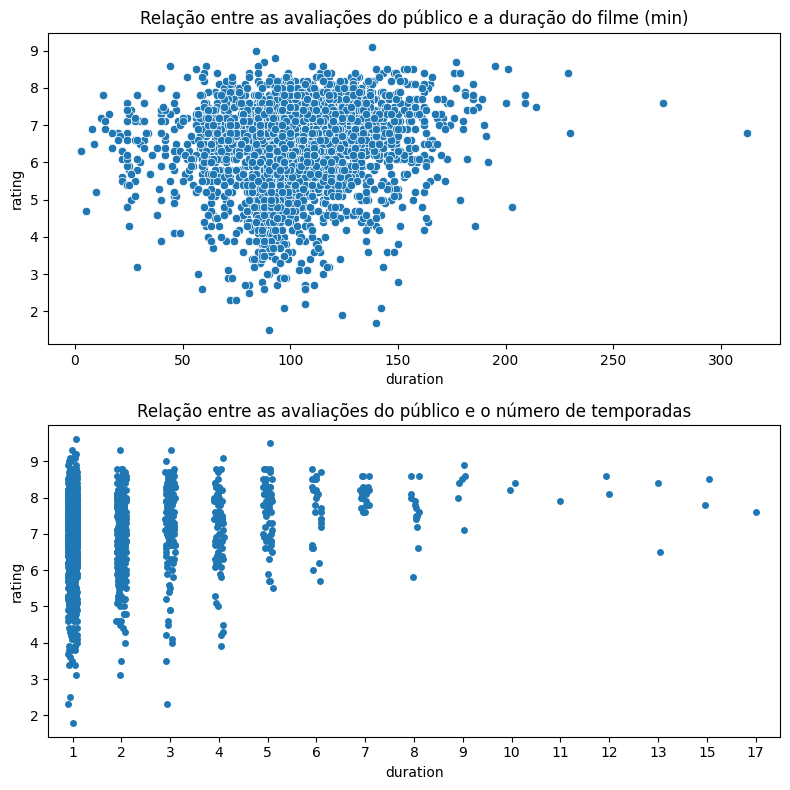

In [29]:
# Criando os subplots
fig, ax = plt.subplots(2, figsize=(8, 8))

# Gráfico de dispersão para os filmes
splot.scatterplot(x=netflix_movies['duration'], y=netflix_movies['rating'], ax=ax[0])
ax[0].set_title('Relação entre as avaliações do público e a duração do filme (min)')

# Gráfico de stripplot para as séries
splot.stripplot(x=netflix_tvshows['duration'], y=netflix_tvshows['rating'], ax=ax[1]) # A variável duration (num de temporadas) não está em ordem, corrijo acima
ax[1].set_title('Relação entre as avaliações do público e o número de temporadas')    # Mesmo colocando em ordem, ele está interpretando como 1,10,11,2,3,4.... Por isso transformarei em intenger

# Ajuste do layout para evitar sobreposição
plt.tight_layout()

# Exibindo o gráfico
plt.show()


**Aqui podemos interpretar cada gráfico independentemente. Existe uma grande dispersão na relação entre 'rating' e 'duration' de filmes, com uma alta presença de filmes entre 50 e 150 min com as mais variadas notas. Não parece haver uma tendência linear ou logística de aumento ou diminuição das notas com relação ao tempo de filme. Enquanto isso, séries com mais temporadas tendem a ter maior nota em média, mas em compensação tem menos instâncias.**

### **b.4. Quais dos diretores na Netflix possuem a melhor consistência na produção audiovisual? (director x rating)**

<ipython-input-17-d9ae6c0a2c9c>:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  splot.pointplot(x='director', y='rating', data=netflix_diretores_filmes, join=False, ci=None, estimator='mean', color='black', markers='+',scale=1.2, ax=ax[0])
<ipython-input-17-d9ae6c0a2c9c>:22: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  splot.pointplot(x='director', y='rating', data=netflix_diretores_filmes, join=False, ci=None, estimator='mean', color='black', markers='+',scale=1.2, ax=ax[0])
<ipython-input-17-d9ae6c0a2c9c>:22: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  splot.pointplot(x='director', y='rating', data=netflix_diretores_filmes, join=False, ci=None, estimator='mean', co

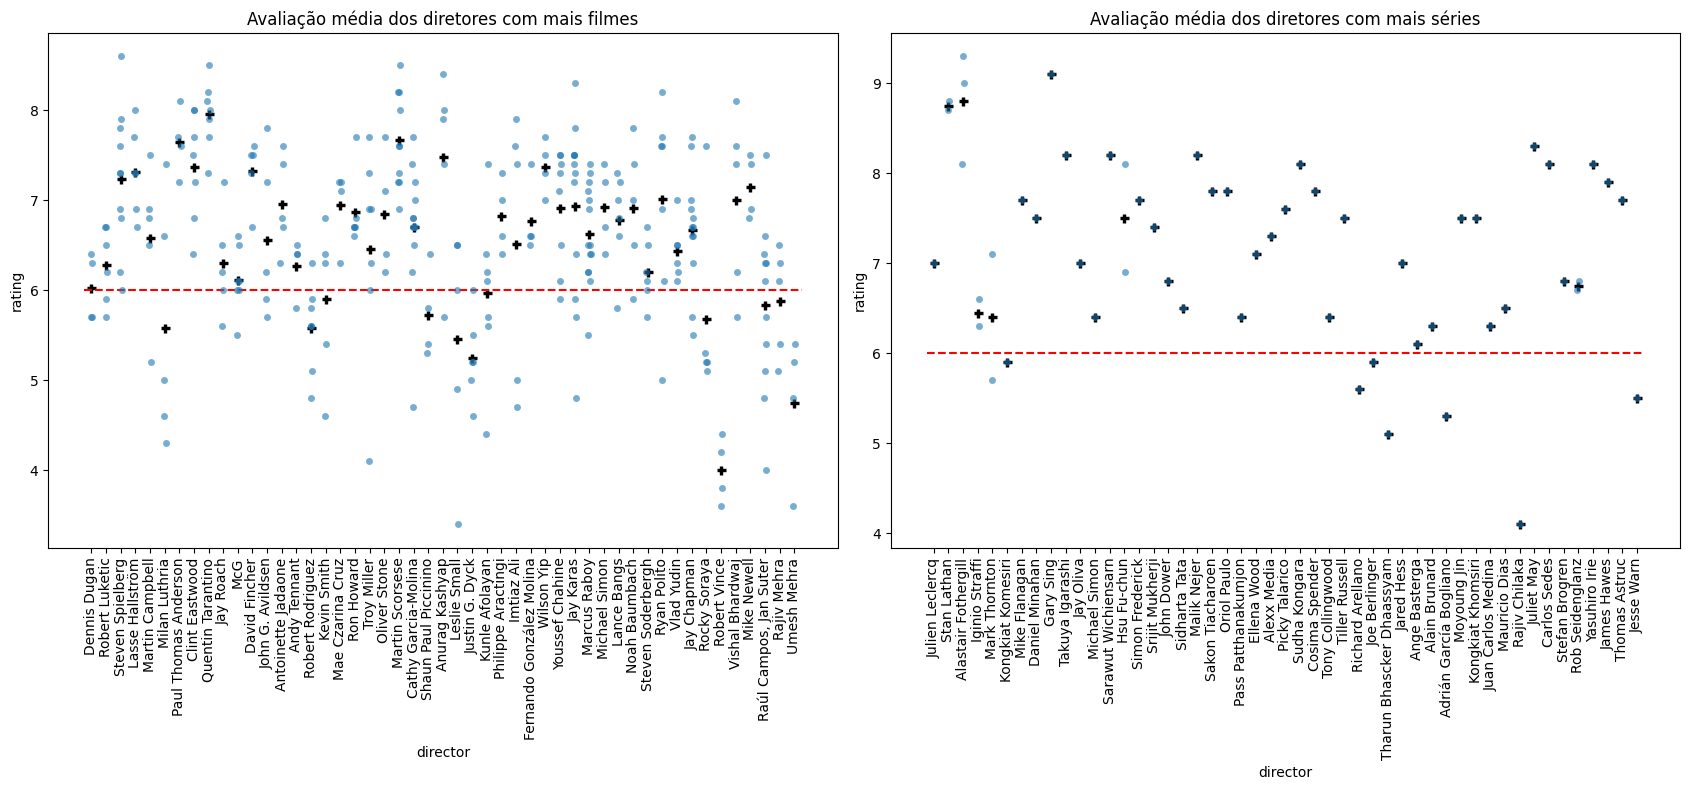

In [17]:
# Contar a frequência de cada diretor
diretores_filmes = netflix_movies['director'].value_counts().nlargest(50).index
diretores_series = netflix_tvshows['director'].value_counts().nlargest(50).index # Aqui podemos escolher o número de diretores que irá aparecer, pois há muitas instâncias

# Filtrar o DataFrame para incluir apenas os 50 diretores com mais filmes/séries na netflix
netflix_diretores_filmes = netflix_movies[netflix_movies['director'].isin(diretores_filmes)]
netflix_diretores_filmes = netflix_diretores_filmes.loc[netflix_diretores_filmes['director'] != 'Not Given'] # Eliminar as instâncias em que não sabemos o(s) diretor(es)
netflix_diretores_series = netflix_tvshows[netflix_tvshows['director'].isin(diretores_series)]
netflix_diretores_series = netflix_diretores_series.loc[netflix_diretores_series['director'] != 'Not Given']

# Há séries com mais de 5 diretores, o que está prejudicando a vizualização dos dados -> Portanto, irei deixar apenas o primeiro diretor
netflix_diretores_series['director'] = netflix_diretores_series['director'].apply(lambda x: x.split(',')[0].strip())

# Criando os subplots
fig, ax = plt.subplots(1,2, figsize=(17,8))

# Adicionar o gráfico de jitter
splot.stripplot(x='director', y='rating', data=netflix_diretores_filmes, jitter=True, alpha=0.6, ax=ax[0])
splot.stripplot(x='director', y='rating', data=netflix_diretores_series, jitter=True, alpha=0.6, ax=ax[1])

# Adicionar as médias
splot.pointplot(x='director', y='rating', data=netflix_diretores_filmes, join=False, ci=None, estimator='mean', color='black', markers='+',scale=1.2, ax=ax[0])
splot.pointplot(x='director', y='rating', data=netflix_diretores_series, join=False, ci=None, estimator='mean', color='black', markers='+',scale=1.2, ax=ax[1])

# Configurar o título e rótulos
ax[0].set_title('Avaliação média dos diretores com mais filmes')
ax[1].set_title('Avaliação média dos diretores com mais séries')

# Loop para criar o corte em nota 6 e colocar os diretores na vertical
for axis in ax:
    left, right = axis.get_xlim()
    axis.hlines(6, xmin=left, xmax=right, color='r', linestyles='--')
    axis.set_xticklabels(axis.get_xticklabels(), rotation=90)

# Ajuste do layout para evitar sobreposição
plt.tight_layout()

# Mostrar o plot
plt.show()

**Optei por fazer esses gráficos com stripplot e pointplots na média por que o boxplot não nos mostra o número de instâncias por classe. Podemos obsevrar que entre os 50 diretores com mais filmes na Netflix, temos tanto diretores aclamados quanto alguns que só produzem filmes ruins. Martin Scorsese, Quentin Tarantino e Steven Spielberg representam ótimos investimentos de títulos ou novas produções para a empresa, enquanto que Robert Vince, Robert Rodriguez e Justin Dyck podem ser descartados. Em séries, como podemos ver, é raro encontrar um diretor com mais de uma obra, e o campeão (Alastair Fothergill) é produtor de documentários de natureza, abundantes na Netflix.**

### **b.5. Qual o tempo de duração média do conteúdo desses diretores? (director x duration)**

<ipython-input-18-4602186ab71b>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  splot.pointplot(x='director', y='duration', data=netflix_diretores_filmes, join=False, ci=None, estimator='mean', color='black', markers='+',scale=1.2, ax=ax[0])
<ipython-input-18-4602186ab71b>:9: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  splot.pointplot(x='director', y='duration', data=netflix_diretores_filmes, join=False, ci=None, estimator='mean', color='black', markers='+',scale=1.2, ax=ax[0])
<ipython-input-18-4602186ab71b>:9: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  splot.pointplot(x='director', y='duration', data=netflix_diretores_filmes, join=False, ci=None, estimator='mean',

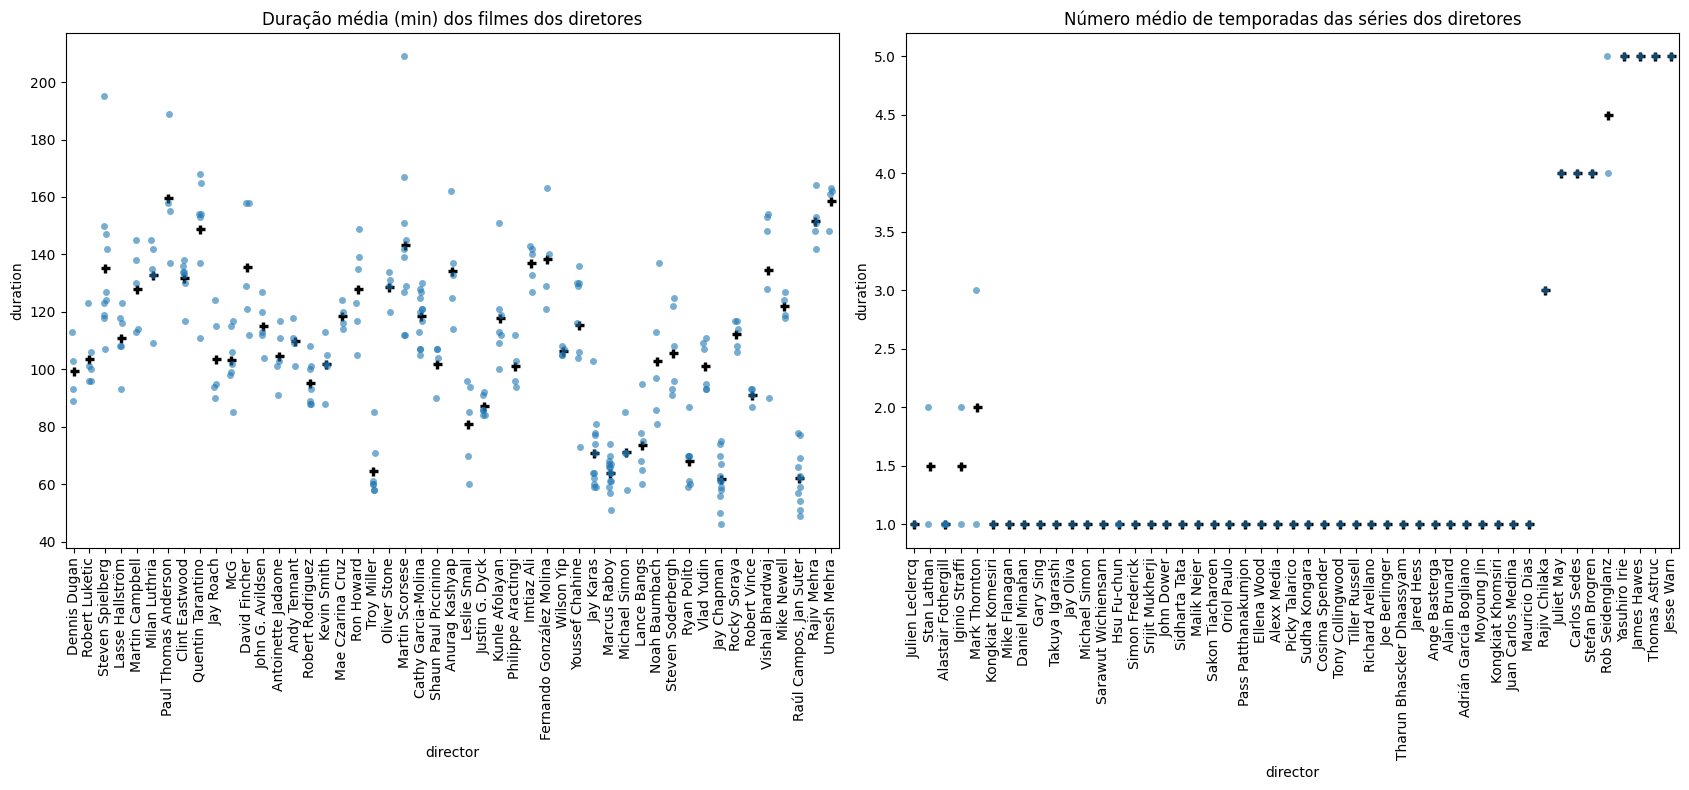

In [18]:
# Criando os subplots
fig, ax = plt.subplots(1,2, figsize=(17,8))

# Adicionar o gráfico de jitter
splot.stripplot(x='director', y='duration', data=netflix_diretores_filmes, jitter=True, alpha=0.6, ax=ax[0])
splot.stripplot(x='director', y='duration', data=netflix_diretores_series, jitter=True, alpha=0.6, ax=ax[1])

# Adicionar as médias
splot.pointplot(x='director', y='duration', data=netflix_diretores_filmes, join=False, ci=None, estimator='mean', color='black', markers='+',scale=1.2, ax=ax[0])
splot.pointplot(x='director', y='duration', data=netflix_diretores_series, join=False, ci=None, estimator='mean', color='black', markers='+',scale=1.2, ax=ax[1])

# Configurar o título e rótulos
ax[0].set_title('Duração média (min) dos filmes dos diretores')
ax[1].set_title('Número médio de temporadas das séries dos diretores')

# Loop para colocar os diretores na vertical
for axis in ax:
    left, right = axis.get_xlim()
    axis.set_xticklabels(axis.get_xticklabels(), rotation=90)

# Ajuste do layout para evitar sobreposição
plt.tight_layout()

# Mostrar o plot
plt.show()

**Podemos observar que em filmes há diretores que produzem filmes mais curtos, e outros mais longos. Marcus Raboy não produziu filmes com mais de 80 min, enquanto que Quentin Tarantino possuí a maioria dos filmes com mais de 2 horas. Como já dito antes, diretoes de séries não tendem a ter mais de uma obra, e a maioria tende a ter uma única temporada.**



### **b.6. Quais países produzem conteúdo que agrada mais o público estadunidense? (country x rating)**





<ipython-input-19-07a0c14580e0>:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  splot.pointplot(x='country', y='rating', data=netflix_paises_filmes, join=False, ci=None, estimator='mean', color='black', markers='+',scale=1.2, ax=ax[0], zorder=2)
<ipython-input-19-07a0c14580e0>:17: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  splot.pointplot(x='country', y='rating', data=netflix_paises_filmes, join=False, ci=None, estimator='mean', color='black', markers='+',scale=1.2, ax=ax[0], zorder=2)
<ipython-input-19-07a0c14580e0>:17: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  splot.pointplot(x='country', y='rating', data=netflix_paises_filmes, join=False, ci=None, estimator='m

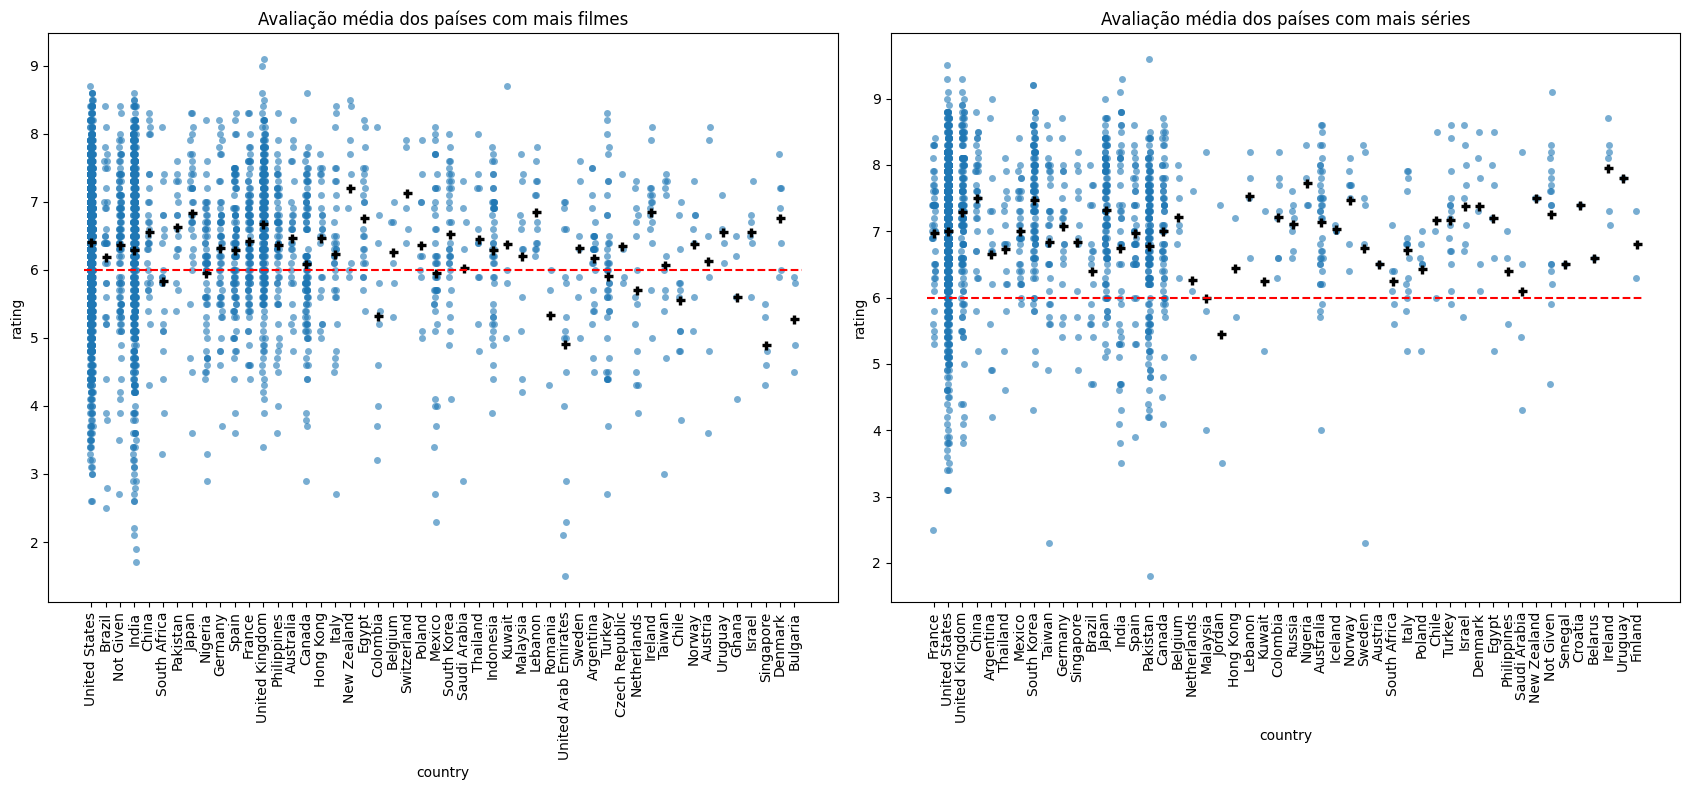

In [19]:
# Contar a frequência de cada diretor
paises_filmes = netflix_movies['country'].value_counts().nlargest(50).index
paises_series = netflix_tvshows['country'].value_counts().nlargest(50).index # Aqui podemos escolher o número de diretores que irá aparecer, pois há muitas instâncias

# Filtrar o DataFrame para incluir apenas os 50 diretores com mais filmes/séries na netflix
netflix_paises_filmes = netflix_movies[netflix_movies['country'].isin(paises_filmes)]
netflix_paises_series = netflix_tvshows[netflix_tvshows['country'].isin(paises_series)]

# Criando os subplots
fig, ax = plt.subplots(1,2, figsize=(17,8))

# Adicionar o gráfico de jitter
splot.stripplot(x='country', y='rating', data=netflix_paises_filmes, jitter=True, alpha=0.6, ax=ax[0], zorder=1)
splot.stripplot(x='country', y='rating', data=netflix_paises_series, jitter=True, alpha=0.6, ax=ax[1], zorder=1)

# Adicionar as médias
splot.pointplot(x='country', y='rating', data=netflix_paises_filmes, join=False, ci=None, estimator='mean', color='black', markers='+',scale=1.2, ax=ax[0], zorder=2)
splot.pointplot(x='country', y='rating', data=netflix_paises_series, join=False, ci=None, estimator='mean', color='black', markers='+',scale=1.2, ax=ax[1], zorder=2)

# Configurar o título e rótulos
ax[0].set_title('Avaliação média dos países com mais filmes')
ax[1].set_title('Avaliação média dos países com mais séries')

# Loop para criar o corte em nota 6 e colocar os países na vertical
for axis in ax:
    left, right = axis.get_xlim()
    axis.hlines(6, xmin=left, xmax=right, color='r', linestyles='--')
    axis.set_xticklabels(axis.get_xticklabels(), rotation=90)

# Ajuste do layout para evitar sobreposição
plt.tight_layout()

# Mostrar o plot
plt.show()

**Podemos observar que estadunidenses tendem, em média, a gostar cosnsitentemente de: filmes da Inglaterra, do Japão, da França, Indonésia...; e séries inglesas, chinesas, taiwanesas e japonesas (provavelmente animes).**

### **b.7. Quais gêneros de filmes/séries o público estadunidense tende a gostar mais?**


<ipython-input-20-39a8d067de11>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  splot.pointplot(x='listed_in', y='rating', data=netflix_exploded_movies, join=False, ci=None, estimator='mean', color='black', markers='+',scale=1.2, ax=ax[0], zorder=2)
<ipython-input-20-39a8d067de11>:14: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  splot.pointplot(x='listed_in', y='rating', data=netflix_exploded_movies, join=False, ci=None, estimator='mean', color='black', markers='+',scale=1.2, ax=ax[0], zorder=2)
<ipython-input-20-39a8d067de11>:14: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  splot.pointplot(x='listed_in', y='rating', data=netflix_exploded_movies, join=False, ci=None, 

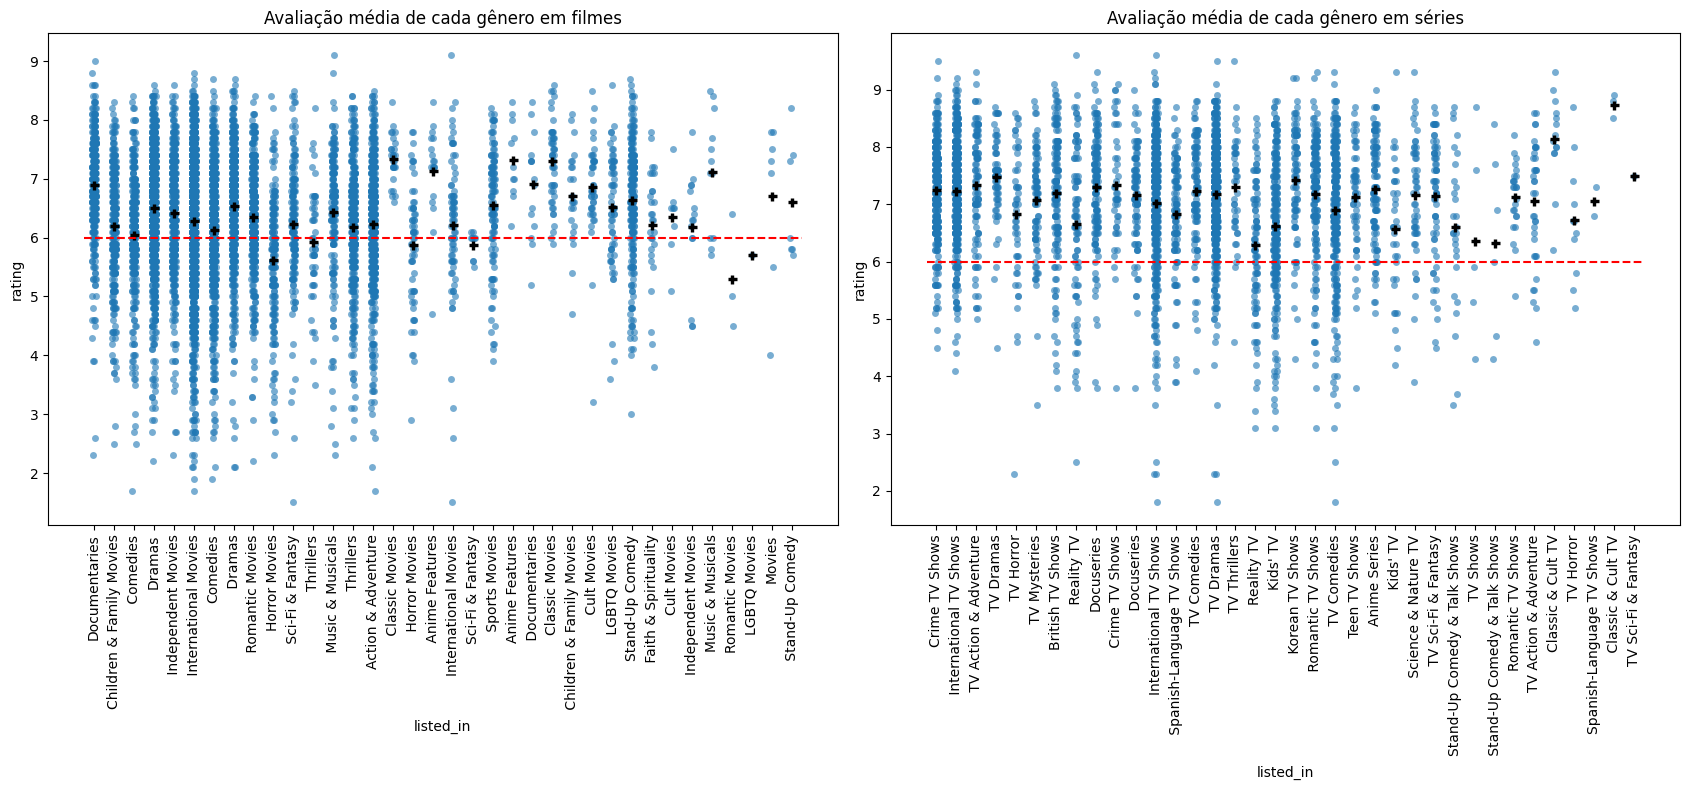

In [20]:
# Explodir a coluna 'genero' para linhas individuais
netflix_exploded = netflix.explode('listed_in')
netflix_exploded_series = netflix_exploded[netflix_exploded['type'] == 'TV Show']
netflix_exploded_movies = netflix_exploded[netflix_exploded['type'] == 'Movie']

# Criando os subplots
fig, ax = plt.subplots(1,2, figsize=(17,8))

# Adicionar o gráfico de jitter
splot.stripplot(x='listed_in', y='rating', data=netflix_exploded_movies, jitter=True, alpha=0.6, ax=ax[0], zorder=1)
splot.stripplot(x='listed_in', y='rating', data=netflix_exploded_series, jitter=True, alpha=0.6, ax=ax[1], zorder=1)

# Adicionar as médias
splot.pointplot(x='listed_in', y='rating', data=netflix_exploded_movies, join=False, ci=None, estimator='mean', color='black', markers='+',scale=1.2, ax=ax[0], zorder=2)
splot.pointplot(x='listed_in', y='rating', data=netflix_exploded_series, join=False, ci=None, estimator='mean', color='black', markers='+',scale=1.2, ax=ax[1], zorder=2)

# Configurar o título e rótulos
ax[0].set_title('Avaliação média de cada gênero em filmes')
ax[1].set_title('Avaliação média de cada gênero em séries')

# Loop para criar o corte em nota 6 e colocar os gêneros na vertical
for axis in ax:
    left, right = axis.get_xlim()
    axis.hlines(6, xmin=left, xmax=right, color='r', linestyles='--')
    axis.set_xticklabels(axis.get_xticklabels(), rotation=90)

# Ajuste do layout para evitar sobreposição
plt.tight_layout()

# Mostrar o plot
plt.show()


**Em média, filmes clássicos, documentários, stand-ups e filmes de esporte fazem mais sucesso nos Estados Unidos. Já para séries, Dramas, Ação & Aventura e Kids'TV tendem a ter mehores notas.**

## **5. Processamento para modelos de machine-learning**

### **a. Separar os dados em conjunto de treino e de teste**



In [24]:
# Separação em treino e teste para filmes
X_movie = netflix_movies.drop(columns=['rating'])  # Remover a coluna 'rating' de X (input)
y_movie = netflix_movies['rating']  # Definir Y como a coluna 'rating' (output)

X_train_movie, X_test_movie, y_train_movie, y_test_movie = train_test_split(X_movie, y_movie, test_size=0.2, random_state=42)

# Separação em treino e teste para séries
X_series = netflix_tvshows.drop(columns=['rating'])  # Remover a coluna 'rating' de X (input)
y_series = netflix_tvshows['rating']  # Definir Y como a coluna 'rating' (output)

X_train_series, X_test_series, y_train_series, y_test_series = train_test_split(X_series, y_series, test_size=0.2, random_state=42)

# Transformar y em dataframe

y_train_movie = y_train_movie.to_frame()
y_test_movie = y_test_movie.to_frame()
y_train_series = y_train_series.to_frame()
y_test_series = y_test_series.to_frame()

### **b. Remover outliers**

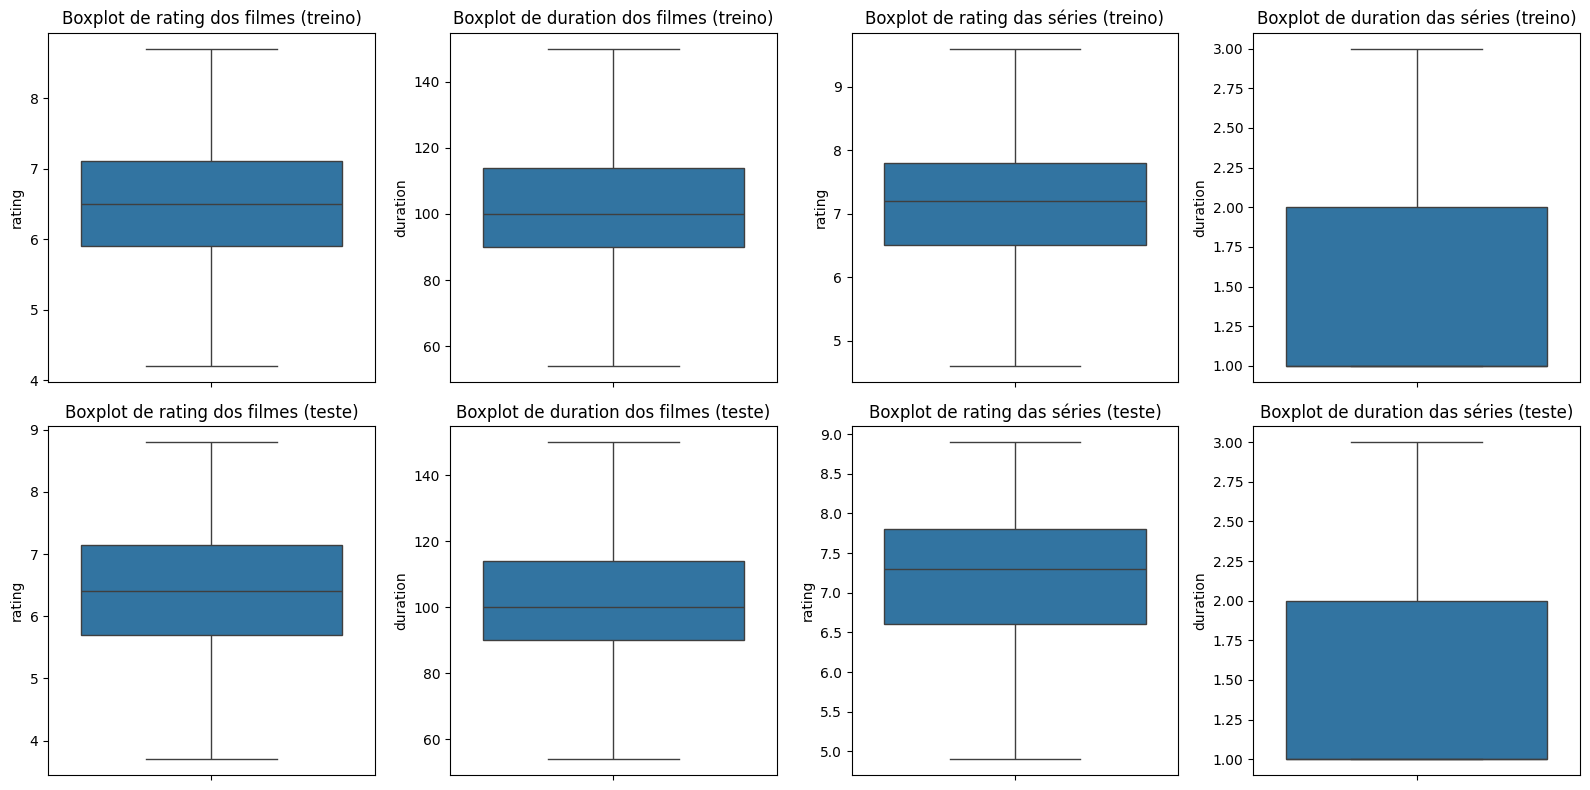

In [26]:
#Remove outliers iterativamente de uma coluna numérica com base no IQR,
def remover_outliers_iterativamente(df, coluna):
    # Loop até que não haja mais outliers
    while True:
        # Calcular o primeiro quartil (Q1) e o terceiro quartil (Q3)
        Q1 = df[coluna].quantile(0.25)
        Q3 = df[coluna].quantile(0.75)
        # Calcular o IQR
        IQR = Q3 - Q1
        # Definir limites dos whiskers
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        # Filtrar os dados para remover outliers
        df_filtrado = df[(df[coluna] >= limite_inferior) & (df[coluna] <= limite_superior)]
        # Se o número de linhas não mudou, significa que não há mais outliers
        if len(df_filtrado) == len(df):
            break
        # Atualizar o dataframe com o novo filtro
        df = df_filtrado
    return df

# Aplicar a função nas colunas de interesse

# Filmes
X_train_movie = remover_outliers_iterativamente(X_train_movie, 'duration')
X_test_movie = remover_outliers_iterativamente(X_test_movie, 'duration')
y_train_movie = remover_outliers_iterativamente(y_train_movie, 'rating')
y_test_movie = remover_outliers_iterativamente(y_test_movie, 'rating')

# Séries
X_train_series = remover_outliers_iterativamente(X_train_series, 'duration')
X_test_series = remover_outliers_iterativamente(X_test_series, 'duration')
y_train_series = remover_outliers_iterativamente(y_train_series, 'rating')
y_test_series = remover_outliers_iterativamente(y_test_series, 'rating')

# Boxplot para checar se deu certo após remover outliers
fig, ax = plt.subplots(2,4, figsize=(16,8))

# Boxplot de rating dos filmes (treino)
splot.boxplot(y_train_movie['rating'], ax=ax[0,0])
ax[0,0].set_title('Boxplot de rating dos filmes (treino)')

# Boxplot de duration dos filmes (treino)
splot.boxplot(X_train_movie['duration'], ax=ax[0,1])
ax[0,1].set_title('Boxplot de duration dos filmes (treino)')

# Boxplot de rating das séries (treino)
splot.boxplot(y_train_series['rating'], ax=ax[0,2])
ax[0,2].set_title('Boxplot de rating das séries (treino)')

# Boxplot de duration das séries (treino)
splot.boxplot(X_train_series['duration'], ax=ax[0,3])
ax[0,3].set_title('Boxplot de duration das séries (treino)')

# Boxplot de rating dos filmes (teste)
splot.boxplot(y_test_movie['rating'], ax=ax[1,0])
ax[1,0].set_title('Boxplot de rating dos filmes (teste)')

# Boxplot de duration dos filmes (teste)
splot.boxplot(X_test_movie['duration'], ax=ax[1,1])
ax[1,1].set_title('Boxplot de duration dos filmes (teste)')

# Boxplot de rating das séries (teste)
splot.boxplot(y_test_series['rating'], ax=ax[1,2])
ax[1,2].set_title('Boxplot de rating das séries (teste)')

# Boxplot de duration das séries (teste)
splot.boxplot(X_test_series['duration'], ax=ax[1,3])
ax[1,3].set_title('Boxplot de duration das séries (teste)')

plt.tight_layout()
plt.show()

### **c. Normalizar e Padronizar os dados**

In [27]:
# Normalização

# Definindo o transformador como MinMaxScaler
scaler = MinMaxScaler()

# Selecionando apenas as colunas que você deseja normalizar (rating e duration)

X_train_movie['duration'] = scaler.fit_transform(X_train_movie[['duration']])
X_test_movie['duration'] = scaler.transform(X_test_movie[['duration']])
X_train_series['duration'] = scaler.fit_transform(X_train_series[['duration']])
X_test_series['duration'] = scaler.transform(X_test_series[['duration']])

y_train_movie['rating'] = scaler.fit_transform(y_train_movie[['rating']])
y_test_movie['rating'] = scaler.transform(y_test_movie[['rating']])
y_train_series['rating'] = scaler.fit_transform(y_train_series[['rating']])
y_test_series['rating'] = scaler.transform(y_test_series[['rating']])

# Checando
print("X_train_movie head:\n", X_train_movie.head(), "\n")

X_train_movie head:
      show_id   type              title                      director  \
502     s359  Movie            The Net                 Irwin Winkler   
2950   s4006  Movie               Girl                   Lukas Dhont   
955     s914  Movie      Time to Dance        Stanley Menino D'Costa   
1341   s1475  Movie      Tarung Sarung               Archie Hekagery   
4631   s6415  Movie  Can't Hardly Wait  Harry Elfont, Deborah Kaplan   

            country  date_added release_year  duration  \
502   United States    8/1/2021         1995  0.625000   
2950    Netherlands   3/15/2019         2018  0.541667   
955           India    5/7/2021         2020  0.552083   
1341      Indonesia  12/31/2020         2020  0.645833   
4631  United States    1/1/2021         1998  0.489583   

                                              listed_in  
502                                         [Thrillers]  
2950     [Dramas,  International Movies,  LGBTQ Movies]  
955   [Dramas,  Interna

<ipython-input-27-97077f9059c3>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train_series['rating'] = scaler.fit_transform(y_train_series[['rating']])


In [28]:
# Padronização

# Definindo o transformador como MinMaxScaler
standard = StandardScaler()

# Selecionando apenas as colunas que você deseja normalizar (rating e duration)

X_train_movie['duration'] = standard.fit_transform(X_train_movie[['duration']])
X_test_movie['duration'] = standard.transform(X_test_movie[['duration']])
X_train_series['duration'] = standard.fit_transform(X_train_series[['duration']])
X_test_series['duration'] = standard.transform(X_test_series[['duration']])

y_train_movie['rating'] = standard.fit_transform(y_train_movie[['rating']])
y_test_movie['rating'] = standard.transform(y_test_movie[['rating']])
y_train_series['rating'] = standard.fit_transform(y_train_series[['rating']])
y_test_series['rating'] = standard.transform(y_test_series[['rating']])

# Checando
print("X_train_movie head:\n", X_train_movie.head(), "\n")

X_train_movie head:
      show_id   type              title                      director  \
502     s359  Movie            The Net                 Irwin Winkler   
2950   s4006  Movie               Girl                   Lukas Dhont   
955     s914  Movie      Time to Dance        Stanley Menino D'Costa   
1341   s1475  Movie      Tarung Sarung               Archie Hekagery   
4631   s6415  Movie  Can't Hardly Wait  Harry Elfont, Deborah Kaplan   

            country  date_added release_year  duration  \
502   United States    8/1/2021         1995  0.608242   
2950    Netherlands   3/15/2019         2018  0.199739   
955           India    5/7/2021         2020  0.250802   
1341      Indonesia  12/31/2020         2020  0.710368   
4631  United States    1/1/2021         1998 -0.055576   

                                              listed_in  
502                                         [Thrillers]  
2950     [Dramas,  International Movies,  LGBTQ Movies]  
955   [Dramas,  Interna

<ipython-input-28-f1bd93e71539>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train_series['rating'] = standard.fit_transform(y_train_series[['rating']])


### **d. Conclusão**

Agora os dados estão prontos para serem usados futuramente em um modelo de machine-learning.